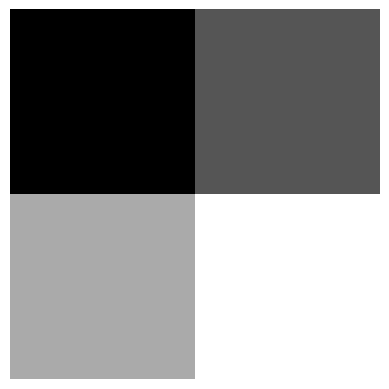

In [22]:
import matplotlib.pyplot as plt

plt.imshow([[1, 2], [3, 4]], cmap='gray')
plt.axis('off')
plt.show()

In [23]:
# load mnist dataset using torch

import torchvision.datasets as datasets

mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)

mnist_trainset

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train

In [24]:
x_sample, y_sample=mnist_trainset[0]

In [25]:
y_sample


5

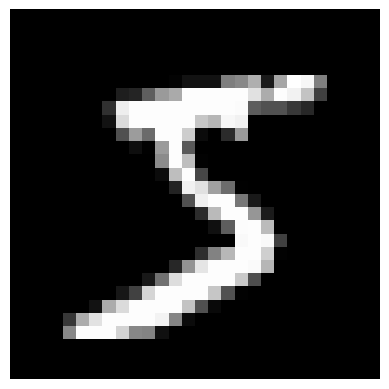

In [26]:
plt.imshow(x_sample, cmap='gray')
plt.axis('off')
plt.show()

In [27]:
import torch
torch.tensor(list(x_sample.getdata()), dtype=torch.float32)

tensor([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   

## Schritte
* Dataset bauen
* Modell bauen
* Loss-Funktion, optimizer
* Trainingsschleife

x.shape: torch.Size([784])
y: tensor(5)


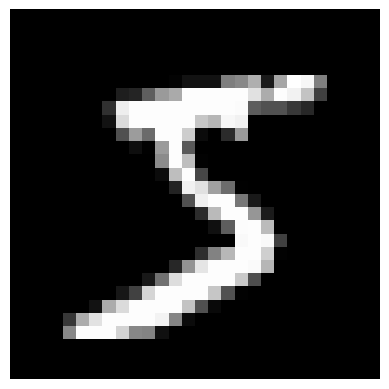

In [28]:
import torch

class MyDataset(torch.utils.data.Dataset):
    def __init__(self, ds):
        self.ds=ds  

    def __len__(self):
        return len(self.ds)
    
    def __getitem__(self, idx):
        # self.ds ist ein Dataset besteht aus Tupeln (x, y) wobei x jeweils ein PIL-Image ist
        x, y=self.ds[idx]
        y=torch.tensor(y)


        # get values of pil image x
        x=torch.tensor(list(x.getdata()), dtype=torch.float32)

        # Ziel: x: als Tensor mit 784 Elementen, y: als Tensor mit 1 Element
        return x, y
    
dataset_sample=MyDataset(mnist_trainset)
x, y=dataset_sample[0]
print("x.shape:", x.shape)          # torch.Size([784])
print("y:", y)                      # tensor(5)

image=x.reshape(28, 28)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

In [29]:
loss_func=torch.nn.CrossEntropyLoss()


y_hat=torch.tensor([[
    0.9,                                                        
    0.2,                                                        
    0.3,                                                        
    0.4,
    0.5,
    2.6,  # Netz ist sich sehr sicher, es ist ne 5
    0.7,
    0.8,
    0.1,
    0.1    # Netz ist sich ziemlich sicher, es ist keine 9
]])

y_target=torch.tensor([5])

loss_func(y_hat, y_target)

tensor(0.7352)

In [30]:

class MyModel(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1=torch.nn.Linear(784, 10)

    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, idx):
        # self.ds ist ein Dataset besteht aus Tupeln (x, y) wobei x jeweils ein PIL-Image ist
        x, y=self.ds[idx]
        y=torch.tensor(y)


        # get values of pil image x
        x=torch.tensor(list(x.getdata()), dtype=torch.float32)

        # Ziel: x: als Tensor mit 784 Elementen, y: als Tensor mit 1 Element
        return x, y
        
    def forward(self, x):
        x=self.layer1(x)
        return x


In [31]:
class MyModel(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1=torch.nn.Linear(784, 128)
        self.layer2=torch.nn.Linear(128, 10)
        self.batch_norm=torch.nn.BatchNorm1d(128)
        self.relu=torch.nn.ReLU()

    def forward(self, x):
        x=self.relu(self.layer1(x))
        x=self.batch_norm(x)
        x=self.layer2(x)
        return x
    

model=MyModel()

# optimizer=torch.optim.SGD(model.parameters(), lr=0.1)
optimizer=torch.optim.SGD(model.parameters(), lr=0.01)

# x und y in Dataloader verpacken
data = MyDataset(mnist_trainset)
dataloader=torch.utils.data.DataLoader(dataset_sample, batch_size=128, shuffle=True)

# Loss Funktion
loss_func=torch.nn.CrossEntropyLoss()

# Training Loop
for epoch in range(10):
    for x, y in dataloader:
        optimizer.zero_grad()
        y_hat=model(x)
        loss=loss_func(y_hat, y)
        loss.backward()
        optimizer.step()
    print("Epoch:", epoch, "Loss:", loss.item())


Epoch: 0 Loss: 0.3724691867828369
Epoch: 1 Loss: 0.30982232093811035
Epoch: 2 Loss: 0.1344732791185379
Epoch: 3 Loss: 0.11332709342241287
Epoch: 4 Loss: 0.18021731078624725
Epoch: 5 Loss: 0.15451134741306305
Epoch: 6 Loss: 0.05612431839108467
Epoch: 7 Loss: 0.057633429765701294
Epoch: 8 Loss: 0.0679655447602272
Epoch: 9 Loss: 0.025963185355067253


In [32]:
# testen
mnist_trainset = datasets.MNIST(root='./data', train=False, download=True, transform=None)
testset=MyDataset(mnist_trainset)
dataloader=torch.utils.data.DataLoader(testset, batch_size=100, shuffle=True)

n_correct=0
n_total=0
for x, y in dataloader:
    y_hat=model(x)
    n_correct+=(y_hat.argmax(1)==y).sum().item()
    n_total+=len(y)
print("Accuracy Score:", n_correct/n_total)


Accuracy Score: 0.9707
